In [387]:
# Kaggle Competitions: Outflow of user (DeepLearningSchool)
# https://www.kaggle.com/competitions/advanced-dls-spring-2021


In [388]:
# imports
import pandas as pd
import numpy as np
import re

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

## Load data

In [389]:
# pathes/filenames
PATH_PROJECT = ""
PATH_DATASET = PATH_PROJECT + "dataset/"

train_filename = PATH_DATASET + "train.csv"
test_filename = PATH_DATASET + "test.csv"
submission_filename = PATH_DATASET + "submission.csv"

In [390]:
# Load dataset
outflow_users_df = pd.read_csv(train_filename)
test_outflow_users_df = pd.read_csv(test_filename)

# Numeric columns
num_cols = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']
# Categorical columns
cat_cols = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 
           'HasPhoneService',
           'HasMultiplePhoneNumbers', 
           'HasInternetService', 
           'HasOnlineSecurityService', 
           'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
           'HasMovieSubscription','HasContractPhone', 'IsBillingPaperless', 'PaymentMethod',
           ]
# Target column
target_colname = "Churn"
y_data = outflow_users_df[target_colname]

# Column "TotalSpent" contains spaces (" "). Set mean value
# replace empty string on zero value (0)
outflow_users_df["TotalSpent"] = [float(re.sub(r"\s+", "0", x)) for x in outflow_users_df["TotalSpent"].values]
# replace zero value on mean value
outflow_users_df["TotalSpent"] = np.where(outflow_users_df["TotalSpent"] == 0,outflow_users_df["TotalSpent"].mean(),  outflow_users_df["TotalSpent"])



# show shape
print(outflow_users_df.shape, test_outflow_users_df.shape)
outflow_users_df.head(3)

(5282, 20) (1761, 19)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1


In [391]:
# Removing synonyms test/train datasets
def remove_synonyms(df):
    # remove synonyms phone service
    list_phone_service = ["HasMultiplePhoneNumbers"]
    for phone_service in list_phone_service:
        df[phone_service] = np.where(df[phone_service] == "No phone service", "No",  df[phone_service])
    
    # remove synonyms internet service
    list_internet_service = ["HasOnlineSecurityService", "HasOnlineBackup", "HasDeviceProtection", 
                             "HasTechSupportAccess", "HasOnlineTV", "HasMovieSubscription"
                            ]
    for internet_service in list_internet_service:
        df[internet_service] = np.where(df[internet_service] == "No internet service", "No",  df[internet_service])
    return df

outflow_users_df = remove_synonyms(outflow_users_df)
test_outflow_users_df = remove_synonyms(test_outflow_users_df)

In [ ]:
def correct_total_spent

In [ ]:
'TotalSpent' ~= 'ClientPeriod' * 'MonthlySpending'
'ClientPeriod' high corr with "HasContractPhone"

In [425]:
outflow_users_df.groupby("HasPhoneService").count()
# outflow_users_df[outflow_users_df["HasPhoneService"] == "No"]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
9,72,61.20,4390.25,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
13,26,38.85,1025.15,Female,0,Yes,Yes,No,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),0
23,48,45.30,2145.00,Female,0,Yes,No,No,No,DSL,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),1
30,21,26.05,565.75,Male,0,Yes,Yes,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0
50,3,29.75,96.85,Male,0,No,No,No,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,37,35.80,1316.90,Male,0,No,No,No,No,DSL,No,No,No,No,Yes,No,Two year,No,Credit card (automatic),0
5219,66,54.65,3632.00,Male,0,Yes,Yes,No,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
5224,71,47.60,3377.80,Female,0,Yes,No,No,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
5277,3,30.40,82.15,Male,0,No,No,No,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0


In [424]:
# test_columns = ['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 
#            'HasPhoneService',
#            'HasMultiplePhoneNumbers', 
#            'HasInternetService', 
#            'HasOnlineSecurityService', 
#            'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV',
#            'HasMovieSubscription','HasContractPhone', 'IsBillingPaperless', 'PaymentMethod',
#            ]
# # print()
# for test_column in test_columns:
#     print(outflow_users_df.groupby(test_column)[test_column].count())
#     print(test_outflow_users_df.groupby(test_column)[test_column].count())
#     print("-"*30)
outflow_users_df.groupby("HasContractPhone")["Sex"].count()

HasContractPhone
Month-to-month    2920
One year          1082
Two year          1280
Name: Sex, dtype: int64

In [445]:
outflow_users_df.sort_values(by="TotalSpent", ascending=False)[2000:2100]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3384,23,99.95,2292.750000,Male,0,No,No,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
4326,0,25.35,2287.486161,Male,0,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,0
1707,0,73.35,2287.486161,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
1048,0,25.75,2287.486161,Male,0,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,0
3697,0,20.00,2287.486161,Female,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,0
4002,0,61.90,2287.486161,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,2287.486161,Female,0,Yes,Yes,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
3078,0,80.85,2287.486161,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
2543,0,19.70,2287.486161,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,0
4551,0,52.55,2287.486161,Female,0,Yes,Yes,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0


In [436]:
outflow_users_df.sort_values(by="TotalSpent", ascending=True)[:300]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3966,1,18.80,18.80,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0
2745,1,18.90,18.90,Male,0,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
4208,1,19.05,19.05,Male,0,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
856,1,19.10,19.10,Female,0,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
4318,1,19.10,19.10,Female,0,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
3227,1,19.10,19.10,Male,0,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
3745,1,19.15,19.15,Female,0,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
750,1,19.20,19.20,Male,0,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Electronic check,0
148,1,19.20,19.20,Male,0,No,Yes,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
5257,1,19.20,19.20,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,0


In [448]:
outflow_users_df["IsSeniorCitizen"].unique()
test_outflow_users_df[test_outflow_users_df["ClientPeriod"] == 0]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check


In [418]:
outflow_users_df.info()
outflow_users_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2291.383808,0.159409,0.262022
std,24.550326,30.176464,2267.079962,0.366092,0.439776
min,0.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.462500,401.587500,0.000000,0.000000
50%,29.000000,70.400000,1413.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [417]:
# Check is NaN values
outflow_users_df.isna().sum(), test_outflow_users_df.isna().sum()

(ClientPeriod                0
 MonthlySpending             0
 TotalSpent                  0
 Sex                         0
 IsSeniorCitizen             0
 HasPartner                  0
 HasChild                    0
 HasPhoneService             0
 HasMultiplePhoneNumbers     0
 HasInternetService          0
 HasOnlineSecurityService    0
 HasOnlineBackup             0
 HasDeviceProtection         0
 HasTechSupportAccess        0
 HasOnlineTV                 0
 HasMovieSubscription        0
 HasContractPhone            0
 IsBillingPaperless          0
 PaymentMethod               0
 Churn                       0
 dtype: int64,
 ClientPeriod                0
 MonthlySpending             0
 TotalSpent                  0
 Sex                         0
 IsSeniorCitizen             0
 HasPartner                  0
 HasChild                    0
 HasPhoneService             0
 HasMultiplePhoneNumbers     0
 HasInternetService          0
 HasOnlineSecurityService    0
 HasOnlineBackup        

### PreProcessing Data

##### One-Hot Encoder Categorical columns

In [396]:
# One-Hot Encoder ("OneHotEncoder" better than "get_dummies")
from sklearn.preprocessing import OneHotEncoder
sk_ohe = OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False, dtype=int) 
sk_ohe = sk_ohe.fit(outflow_users_df[cat_cols])
df_cat_ohe_sklearn = pd.DataFrame(sk_ohe.transform(outflow_users_df[cat_cols]), columns=sk_ohe.get_feature_names_out())

# show shape
print(df_cat_ohe_sklearn.shape)
df_cat_ohe_sklearn.head(3)

(5282, 20)


,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_Yes,HasOnlineBackup_Yes,HasDeviceProtection_Yes,HasTechSupportAccess_Yes,HasOnlineTV_Yes,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


##### Join prepoc columns

In [397]:
# Concatenate OHE columns + numeric columns
x_data = pd.concat([outflow_users_df[num_cols], df_cat_ohe_sklearn],axis=1)

# show shape
print(x_data.shape)
x_data.head(3)

(5282, 23)


,ClientPeriod,MonthlySpending,TotalSpent,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_Yes,HasOnlineBackup_Yes,HasDeviceProtection_Yes,HasTechSupportAccess_Yes,HasOnlineTV_Yes,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,72,25.85,1872.20,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,1,75.90,75.90,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0


### Data analysis
#### Correlation matrix

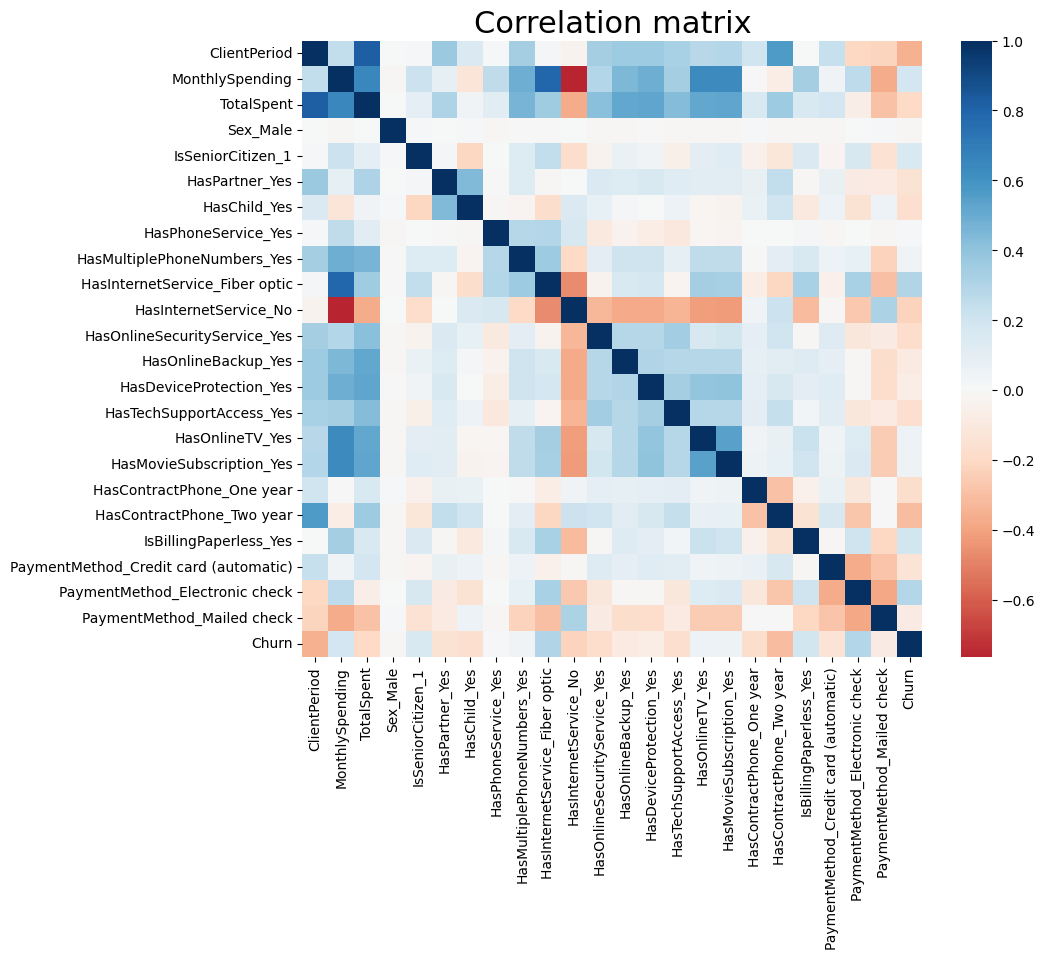

In [398]:
correlation = pd.concat([x_data,y_data], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns,
    yticklabels=correlation.columns,
    cmap="RdBu",
    center=0,
)

plt.title("Correlation matrix", fontsize=22)
plt.show()

In [399]:
# # Remove corr features
# x_data = x_data.drop(columns=["HasOnlineSecurityService_No internet service", 
#                               "HasOnlineBackup_No internet service", 
#                               "HasDeviceProtection_No internet service",
#                              "HasTechSupportAccess_No internet service",
#                              "HasOnlineTV_No internet service",
#                              "HasMovieSubscription_No internet service"
#                              ])
# # Reverse negativecorr features
# x_data["ClientPeriod"] = x_data["ClientPeriod"]*-1
# x_data["TotalSpent"] = x_data["TotalSpent"]*-1

In [400]:
# correlation = pd.concat([x_data,y_data], axis=1).corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(
#     correlation,
#     xticklabels=correlation.columns,
#     yticklabels=correlation.columns,
#     cmap="RdBu",
#     center=0,
# )

# plt.title("Correlation matrix", fontsize=22)
# plt.show()

##### Train/Test split

In [401]:
# Train/Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.05, shuffle=True, random_state=53)

# show shape
print(x_data.shape, y_data.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train.head(3)

(5282, 23) (5282,) (5017, 23) (265, 23) (5017,) (265,)


,ClientPeriod,MonthlySpending,TotalSpent,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_Yes,HasOnlineBackup_Yes,HasDeviceProtection_Yes,HasTechSupportAccess_Yes,HasOnlineTV_Yes,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2803,26,80.70,2193.0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3165,10,80.70,788.8,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
548,65,100.15,6643.5,0,0,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0


##### Normalization Numeric columns 

In [402]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on train data!
scaler.fit(x_train[num_cols])
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

# show shape
print(x_data.shape, y_data.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train.head(3)

(5282, 23) (5282,) (5017, 23) (265, 23) (5017,) (265,)


,ClientPeriod,MonthlySpending,TotalSpent,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_Yes,HasOnlineBackup_Yes,HasDeviceProtection_Yes,HasTechSupportAccess_Yes,HasOnlineTV_Yes,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2803,-0.257538,0.525779,-0.040555,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0
3165,-0.909027,0.525779,-0.659968,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
548,1.330467,1.170893,1.922624,0,0,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0


### Create models

In [403]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

from tqdm.notebook import tqdm

In [404]:
max_trees = 100
n_splits = 5
values = np.arange(1, max_trees + 1)

kf = KFold(n_splits=n_splits, shuffle=True, random_state=53)

for k_train, k_valid in tqdm(kf.split(x_train), total=n_splits):
    scores = []
#     print(f"k_train: {k_train[:30]}")
#     print(f"k_validate: {k_valid[:30]}")
    print(x_train.shape, len(k_train), len(k_valid))
    print(x_train.iloc[k_train].shape)
    
    kfold_x_train = x_train.iloc[k_train].values
    kfold_y_train = y_train.iloc[k_train]

    kfold_x_valid = x_train.iloc[k_valid].values
    kfold_y_valid = y_train.iloc[k_valid]
    
    forest_model = RandomForestClassifier(n_estimators=max_trees)
    forest_model.fit(kfold_x_train, kfold_y_train)
    trees = forest_model.estimators_
    print(f"trees: {len(trees)}")
    
    for num in tqdm(values):
        random_forest_model = RandomForestClassifier(n_estimators=num)
        random_forest_model.n_classes_ = 2
        random_forest_model.estimators_ = trees[:num]
#         print(f"n_classes_: {random_forest_model.n_classes_}")
#         print("estimators_" ,random_forest_model.estimators_)
        predict = random_forest_model.predict_proba(kfold_x_valid)[:,1]
#         print(f"predict: {predict}")
        print(f"num:{num}, score: {roc_auc_score(kfold_y_valid, predict)}")


  0%|          | 0/5 [00:00<?, ?it/s]

(5017, 23) 4013 1004
(4013, 23)
trees: 100


  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.6203754561324322
num:2, score: 0.697669170070099
num:3, score: 0.7288955477124041
num:4, score: 0.7298363633397322
num:5, score: 0.7401826161200329
num:6, score: 0.7533540349026283
num:7, score: 0.7630096311241388
num:8, score: 0.7714960056122642
num:9, score: 0.7826797474481058
num:10, score: 0.7858937476547587
num:11, score: 0.7859290962187914
num:12, score: 0.7917262607201319
num:13, score: 0.7919546668261884
num:14, score: 0.790997536476999
num:15, score: 0.7919301947433967
num:16, score: 0.7931130120783323
num:17, score: 0.7936106110950986
num:18, score: 0.7946928209785571
num:19, score: 0.7965608566316625
num:20, score: 0.7979775183132753
num:21, score: 0.79997063350065
num:22, score: 0.8013818569416422
num:23, score: 0.8027658891795326
num:24, score: 0.8018794559584083
num:25, score: 0.8027223832545696
num:26, score: 0.804397361365651
num:27, score: 0.805183187135298
num:28, score: 0.8063007455827891
num:29, score: 0.8061131262813854
num:30, score: 0.806170227807

  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.65964066189093
num:2, score: 0.7141328916699807
num:3, score: 0.742012051771268
num:4, score: 0.762737675125728
num:5, score: 0.7765539183359091
num:6, score: 0.783876099333981
num:7, score: 0.7887541972281933
num:8, score: 0.7916035299507156
num:9, score: 0.7963633251612189
num:10, score: 0.7951576446187381
num:11, score: 0.7976772400739014
num:12, score: 0.7981705874357516
num:13, score: 0.7997286589509824
num:14, score: 0.7981252800249694
num:15, score: 0.7999300252211252
num:16, score: 0.8005139874045397
num:17, score: 0.8029253484895013
num:18, score: 0.8054524951797949
num:19, score: 0.8048836354666411
num:20, score: 0.8045060737101232
num:21, score: 0.803977487250998
num:22, score: 0.8044179759669356
num:23, score: 0.8058426423281968
num:24, score: 0.8066682440357829
num:25, score: 0.8057771982904005
num:26, score: 0.8055607295499967
num:27, score: 0.8076624899946134
num:28, score: 0.808611428542662
num:29, score: 0.8087775557155299
num:30, score: 0.8084830575454

  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.6317373424481948
num:2, score: 0.6722067934202094
num:3, score: 0.7061792352061527
num:4, score: 0.7299695577867976
num:5, score: 0.750301751762444
num:6, score: 0.7652371288186286
num:7, score: 0.7734672078615681
num:8, score: 0.7698194830164494
num:9, score: 0.7749439222388379
num:10, score: 0.7807359538560137
num:11, score: 0.7810056611835077
num:12, score: 0.7815610980559708
num:13, score: 0.784271523178808
num:14, score: 0.7830378124332408
num:15, score: 0.785483870967742
num:16, score: 0.786410489211707
num:17, score: 0.7869018372142704
num:18, score: 0.7883278145695365
num:19, score: 0.786805703909421
num:20, score: 0.7861941892757958
num:21, score: 0.7865573595385602
num:22, score: 0.7892490920743431
num:23, score: 0.7915509506515701
num:24, score: 0.7936365092928862
num:25, score: 0.7941091647083957
num:26, score: 0.7965178380687887
num:27, score: 0.7958716086306346
num:28, score: 0.7973696859645376
num:29, score: 0.7968890194402904
num:30, score: 0.79665402691

  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.6563609511591132
num:2, score: 0.7207088939940927
num:3, score: 0.7529039989656989
num:4, score: 0.7621082833586936
num:5, score: 0.7812801463933726
num:6, score: 0.7898454515618939
num:7, score: 0.7945669361816392
num:8, score: 0.7966877504947738
num:9, score: 0.7973068393153723
num:10, score: 0.8022346868753171
num:11, score: 0.806376863482213
num:12, score: 0.8081321916241508
num:13, score: 0.8094399856789092
num:14, score: 0.8102753826416444
num:15, score: 0.8107850742409325
num:16, score: 0.8137189088124435
num:17, score: 0.8142758401209337
num:18, score: 0.8156184423824726
num:19, score: 0.8164961064534415
num:20, score: 0.8158869628347805
num:21, score: 0.8171698938846953
num:22, score: 0.8188158248053228
num:23, score: 0.8203250091993118
num:24, score: 0.8202777694901096
num:25, score: 0.821331960895466
num:26, score: 0.8219062963073465
num:27, score: 0.8223190221877456
num:28, score: 0.8243304392795696
num:29, score: 0.8256531511372339
num:30, score: 0.82577497

  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.6478890671102399
num:2, score: 0.7061006158537791
num:3, score: 0.7405691201805976
num:4, score: 0.7638690865165647
num:5, score: 0.7712058654626824
num:6, score: 0.7829610487336383
num:7, score: 0.792087467078556
num:8, score: 0.7967633022436088
num:9, score: 0.8028426305471396
num:10, score: 0.8058847699954454
num:11, score: 0.8093798887106675
num:12, score: 0.8107363512148755
num:13, score: 0.8132215489415633
num:14, score: 0.8137908671458842
num:15, score: 0.8143626606467456
num:16, score: 0.8178775817342918
num:17, score: 0.8160458622943028
num:18, score: 0.8168057783322441
num:19, score: 0.8195682092714709
num:20, score: 0.8213652745598923
num:21, score: 0.8213108180360007
num:22, score: 0.8229717420146934
num:23, score: 0.8243232539258203
num:24, score: 0.8236796768252835
num:25, score: 0.8240237430444166
num:26, score: 0.8237539357214994
num:27, score: 0.8230658032832333
num:28, score: 0.8235732390740411
num:29, score: 0.8236227450048516
num:30, score: 0.8242935

In [405]:
max_trees = 100
n_splits = 5
values = np.arange(1, max_trees + 1)

kf = KFold(n_splits=n_splits, shuffle=True, random_state=53)

for k_train, k_valid in tqdm(kf.split(x_train), total=n_splits):
    scores = []
#     print(f"k_train: {k_train[:30]}")
#     print(f"k_validate: {k_valid[:30]}")
    print(x_train.shape, len(k_train), len(k_valid))
    print(x_train.iloc[k_train].shape)
    
    kfold_x_train = x_train.iloc[k_train].values
    kfold_y_train = y_train.iloc[k_train]

    kfold_x_valid = x_train.iloc[k_valid].values
    kfold_y_valid = y_train.iloc[k_valid]
    
    forest_model = RandomForestClassifier(n_estimators=max_trees)
    forest_model.fit(kfold_x_train, kfold_y_train)
    trees = forest_model.estimators_
    print(f"trees: {len(trees)}")
    
    for num in tqdm(values):
        random_forest_model = RandomForestClassifier(n_estimators=num)
        random_forest_model.n_classes_ = 2
        random_forest_model.estimators_ = trees[:num]
#         print(f"n_classes_: {random_forest_model.n_classes_}")
#         print("estimators_" ,random_forest_model.estimators_)
        predict = random_forest_model.predict_proba(kfold_x_valid)[:,1]
#         print(f"predict: {predict}")
        print(f"num:{num}, score: {roc_auc_score(kfold_y_valid, predict)}")


  0%|          | 0/5 [00:00<?, ?it/s]

(5017, 23) 4013 1004
(4013, 23)
trees: 100


  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.6491682210971107
num:2, score: 0.7027077000048944
num:3, score: 0.7301545004160254
num:4, score: 0.7492644779560917
num:5, score: 0.7543220417330585
num:6, score: 0.7615222723144608
num:7, score: 0.7674282016282092
num:8, score: 0.7780273325973581
num:9, score: 0.781445266827276
num:10, score: 0.7832208523898347
num:11, score: 0.7868590353648788
num:12, score: 0.7844934006950072
num:13, score: 0.7894095702158437
num:14, score: 0.790652208197604
num:15, score: 0.7949293844455442
num:16, score: 0.796014313449313
num:17, score: 0.7992446283778272
num:18, score: 0.8015803527242866
num:19, score: 0.802798518623255
num:20, score: 0.8055176389334522
num:21, score: 0.8063605662296134
num:22, score: 0.8061430366047975
num:23, score: 0.8043076303954144
num:24, score: 0.8071110434352278
num:25, score: 0.8073856745865577
num:26, score: 0.8105887983119702
num:27, score: 0.8108634294633
num:28, score: 0.8130360065911477
num:29, score: 0.8138463044435864
num:30, score: 0.8157279356982

  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.627454780686961
num:2, score: 0.6872228067437564
num:3, score: 0.7126276788006625
num:4, score: 0.7317348207588488
num:5, score: 0.7490170808938648
num:6, score: 0.7662288628343309
num:7, score: 0.7783762830807026
num:8, score: 0.7794032510584314
num:9, score: 0.786471207140448
num:10, score: 0.7883137085122557
num:11, score: 0.7880217274205484
num:12, score: 0.7879864883232734
num:13, score: 0.7914197832292102
num:14, score: 0.7945283750245415
num:15, score: 0.7950015857593774
num:16, score: 0.7999929521805449
num:17, score: 0.8000156058859361
num:18, score: 0.7987167934435143
num:19, score: 0.7989836037514536
num:20, score: 0.8018379706307295
num:21, score: 0.8006675291855238
num:22, score: 0.8027541871598798
num:23, score: 0.8032978760892656
num:24, score: 0.8053870511419985
num:25, score: 0.8062478919468595
num:26, score: 0.8049264257990465
num:27, score: 0.8063083018279023
num:28, score: 0.8070130837734025
num:29, score: 0.8074661578812241
num:30, score: 0.80865925

  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.6494312112796411
num:2, score: 0.7045102542191839
num:3, score: 0.7202600939970092
num:4, score: 0.7379406109805597
num:5, score: 0.7508705404828029
num:6, score: 0.759968489638966
num:7, score: 0.7654667806024353
num:8, score: 0.7751895962401196
num:9, score: 0.7791791283913694
num:10, score: 0.7796117282631916
num:11, score: 0.7818815424054688
num:12, score: 0.7849898525955992
num:13, score: 0.7875774407177953
num:14, score: 0.7884159367656484
num:15, score: 0.7872356334116644
num:16, score: 0.7918473616748558
num:17, score: 0.7952841273232214
num:18, score: 0.7970866267891477
num:19, score: 0.8012951292458876
num:20, score: 0.8014179662465285
num:21, score: 0.8018639179662466
num:22, score: 0.8018906216620381
num:23, score: 0.804563661610767
num:24, score: 0.8052552873317667
num:25, score: 0.8057332834864346
num:26, score: 0.8053994872890408
num:27, score: 0.8062459944456313
num:28, score: 0.8068014313180945
num:29, score: 0.8092902157658621
num:30, score: 0.80932760

  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.6723876440811131
num:2, score: 0.7403208322144982
num:3, score: 0.7692414794482402
num:4, score: 0.7861930761504113
num:5, score: 0.7920085329832622
num:6, score: 0.8043977682966853
num:7, score: 0.8055439528199619
num:8, score: 0.8067995345645493
num:9, score: 0.8137114499109905
num:10, score: 0.8103524579566588
num:11, score: 0.8124310051615597
num:12, score: 0.8121599984087677
num:13, score: 0.8114911835784826
num:14, score: 0.811508587681873
num:15, score: 0.8138531690385973
num:16, score: 0.8160982983759484
num:17, score: 0.8161679147895098
num:18, score: 0.8179307018329007
num:19, score: 0.8168193255164047
num:20, score: 0.8168441885212481
num:21, score: 0.8167820310091396
num:22, score: 0.8151112370836691
num:23, score: 0.8163394695229287
num:24, score: 0.8173091267118179
num:25, score: 0.8174135513321598
num:26, score: 0.8182638660978011
num:27, score: 0.8194722081331862
num:28, score: 0.8208023788923033
num:29, score: 0.821565673140993
num:30, score: 0.82049159

  0%|          | 0/100 [00:00<?, ?it/s]

num:1, score: 0.6538619576625279
num:2, score: 0.7204771381611517
num:3, score: 0.7647948474227212
num:4, score: 0.7844214736925483
num:5, score: 0.7857507079348105
num:6, score: 0.7885799718806312
num:7, score: 0.7963326006455573
num:8, score: 0.7984786827461929
num:9, score: 0.7968227093605814
num:10, score: 0.7987608665518129
num:11, score: 0.7971742014693359
num:12, score: 0.7997683122438068
num:13, score: 0.8019515237925504
num:14, score: 0.8051842610744767
num:15, score: 0.8046520723182637
num:16, score: 0.8072461830927344
num:17, score: 0.8086769044931583
num:18, score: 0.8129319392463217
num:19, score: 0.8142537475989624
num:20, score: 0.8179097605893186
num:21, score: 0.8181003584229392
num:22, score: 0.8172018257787282
num:23, score: 0.818028574823264
num:24, score: 0.8187290837442325
num:25, score: 0.8188058179369888
num:26, score: 0.8203281253094121
num:27, score: 0.8219098397988079
num:28, score: 0.8250782193706806
num:29, score: 0.8256277352026773
num:30, score: 0.8264272

### Стекинг

In [406]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict

In [407]:
models = [
#     KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=30, n_jobs=-1),
    LogisticRegression(),
    RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1),
    RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1),
#     DecisionTreeClassifier(max_depth=3),
    DecisionTreeClassifier(max_depth=8),
    ]

In [408]:
train_features_model_predicts = np.zeros(x_train.shape[0])[...,None]
test_features_model_predicts = np.zeros(x_test.shape[0])[...,None]

train_features_model_predicts.shape, test_features_model_predicts.shape

((5017, 1), (265, 1))

In [409]:
for model in models:
    print(f"model: {model}")
    model.fit(x_train, y_train)
    print(type(model))
    
    if type(model) == type(LogisticRegression):
        cv_predict = cross_val_predict(model, x_train, y_train, cv=5, method="predict")
        predict_test = model.predict(x_test)
    else:
        cv_predict = cross_val_predict(model, x_train, y_train, cv=5, method="predict_proba")
        predict_test = model.predict_proba(x_test)

    train_features_model_predicts = np.concatenate((train_features_model_predicts, cv_predict[:, -1][...,None]), axis=1)
    print("cv_predict", cv_predict.shape)
    
    print("predict_test", predict_test.shape)
    test_features_model_predicts = np.concatenate((test_features_model_predicts, predict_test[:, -1][...,None]), axis=1)
    
    print(f"shape: {train_features_model_predicts.shape}")
train_features_model_predicts = train_features_model_predicts[:,1:]
test_features_model_predicts = test_features_model_predicts[:,1:]
    
train_features_model_predicts.shape, test_features_model_predicts.shape

model: KNeighborsClassifier(n_jobs=-1, n_neighbors=30)
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
cv_predict (5017, 2)
predict_test (265, 2)
shape: (5017, 2)
model: LogisticRegression()
<class 'sklearn.linear_model._logistic.LogisticRegression'>
cv_predict (5017, 2)
predict_test (265, 2)
shape: (5017, 3)
model: RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
cv_predict (5017, 2)
predict_test (265, 2)
shape: (5017, 4)
model: RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1)
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
cv_predict (5017, 2)
predict_test (265, 2)
shape: (5017, 5)
model: DecisionTreeClassifier(max_depth=8)
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
cv_predict (5017, 2)
predict_test (265, 2)
shape: (5017, 6)


((5017, 5), (265, 5))

In [410]:
# stacking_model = LinearRegression()
# stacking_model = KNeighborsClassifier(n_neighbors=100)
stacking_model = LogisticRegression()
# stacking_model = RandomForestClassifier(n_estimators=100, )

stacking_model.fit(train_features_model_predicts, y_train)

predict_stacking_model = stacking_model.predict(test_features_model_predicts)
predict_stacking_model_proba = stacking_model.predict_proba(test_features_model_predicts)[:, 1]
# y_train_predicted2 =     stacking_model.predict_proba(train_features_model_predicts)[:, 1]
predict_stacking_model

roc_auc_score(y_test, predict_stacking_model), roc_auc_score(y_test, predict_stacking_model_proba)

(0.664750671842341, 0.8313675724096745)

### xgboost

In [411]:
import xgboost
boosting_model = xgboost.XGBClassifier(n_estimators=500)
boosting_model.fit(x_train, y_train)

predict_boosting = boosting_model.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, predict_boosting)

0.8033741415347865

In [412]:
import catboost
boosting_model = catboost.CatBoostClassifier(n_estimators=500,)
boosting_model.fit(x_train, y_train)

predict_boosting = boosting_model.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, predict_boosting)

Learning rate set to 0.038732
0:	learn: 0.6685636	total: 3.37ms	remaining: 1.68s
1:	learn: 0.6439852	total: 6.55ms	remaining: 1.63s
2:	learn: 0.6217912	total: 9.6ms	remaining: 1.59s
3:	learn: 0.6057216	total: 12.8ms	remaining: 1.58s
4:	learn: 0.5904092	total: 16.1ms	remaining: 1.59s
5:	learn: 0.5730311	total: 19.4ms	remaining: 1.59s
6:	learn: 0.5603981	total: 22.6ms	remaining: 1.59s
7:	learn: 0.5490105	total: 25.8ms	remaining: 1.59s
8:	learn: 0.5387652	total: 28.9ms	remaining: 1.58s
9:	learn: 0.5272530	total: 32ms	remaining: 1.57s
10:	learn: 0.5176475	total: 35.3ms	remaining: 1.57s
11:	learn: 0.5076484	total: 38.6ms	remaining: 1.57s
12:	learn: 0.4991772	total: 41.9ms	remaining: 1.57s
13:	learn: 0.4918685	total: 45.1ms	remaining: 1.56s
14:	learn: 0.4852409	total: 48.4ms	remaining: 1.56s
15:	learn: 0.4790564	total: 51.6ms	remaining: 1.56s
16:	learn: 0.4733509	total: 54.7ms	remaining: 1.55s
17:	learn: 0.4683928	total: 57.8ms	remaining: 1.55s
18:	learn: 0.4643263	total: 61ms	remaining: 1.5

185:	learn: 0.3583847	total: 603ms	remaining: 1.02s
186:	learn: 0.3582057	total: 607ms	remaining: 1.02s
187:	learn: 0.3580152	total: 611ms	remaining: 1.01s
188:	learn: 0.3578373	total: 615ms	remaining: 1.01s
189:	learn: 0.3575991	total: 619ms	remaining: 1.01s
190:	learn: 0.3572011	total: 622ms	remaining: 1.01s
191:	learn: 0.3569260	total: 626ms	remaining: 1s
192:	learn: 0.3567703	total: 629ms	remaining: 1s
193:	learn: 0.3563071	total: 632ms	remaining: 997ms
194:	learn: 0.3559848	total: 635ms	remaining: 994ms
195:	learn: 0.3557373	total: 639ms	remaining: 991ms
196:	learn: 0.3554653	total: 642ms	remaining: 987ms
197:	learn: 0.3551664	total: 645ms	remaining: 984ms
198:	learn: 0.3549955	total: 648ms	remaining: 981ms
199:	learn: 0.3548081	total: 652ms	remaining: 977ms
200:	learn: 0.3546052	total: 655ms	remaining: 974ms
201:	learn: 0.3542651	total: 658ms	remaining: 971ms
202:	learn: 0.3539603	total: 661ms	remaining: 968ms
203:	learn: 0.3537804	total: 665ms	remaining: 964ms
204:	learn: 0.3535

355:	learn: 0.3211642	total: 1.19s	remaining: 481ms
356:	learn: 0.3209728	total: 1.19s	remaining: 478ms
357:	learn: 0.3207860	total: 1.2s	remaining: 475ms
358:	learn: 0.3206156	total: 1.2s	remaining: 472ms
359:	learn: 0.3204396	total: 1.2s	remaining: 469ms
360:	learn: 0.3204015	total: 1.21s	remaining: 465ms
361:	learn: 0.3203156	total: 1.21s	remaining: 462ms
362:	learn: 0.3200749	total: 1.22s	remaining: 459ms
363:	learn: 0.3198941	total: 1.22s	remaining: 455ms
364:	learn: 0.3197211	total: 1.22s	remaining: 452ms
365:	learn: 0.3194870	total: 1.23s	remaining: 449ms
366:	learn: 0.3193542	total: 1.23s	remaining: 445ms
367:	learn: 0.3191492	total: 1.23s	remaining: 442ms
368:	learn: 0.3190096	total: 1.24s	remaining: 439ms
369:	learn: 0.3188596	total: 1.24s	remaining: 435ms
370:	learn: 0.3186375	total: 1.24s	remaining: 432ms
371:	learn: 0.3184434	total: 1.25s	remaining: 429ms
372:	learn: 0.3182276	total: 1.25s	remaining: 425ms
373:	learn: 0.3179613	total: 1.25s	remaining: 422ms
374:	learn: 0.3

0.8386085398626455

In [413]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [414]:
# models = [KNeighborsClassifier(), DecisionTreeClassifier()]
# params_models

params_models = [
    {"name": "KNeighborsClassifier",
    "model": KNeighborsClassifier(),
    "param": {
        "n_neighbors": np.array(np.linspace(4, 10, 8), dtype=int),
#         "algorithm": ["ball_tree", "kd_tree", "brute"],
    },
    },
    {"name": "DecisionTreeClassifier",
    "model": DecisionTreeClassifier(),
    "param": {"max_depth": np.array(np.linspace(1, 30, 2), dtype=int),},
    },
]

In [415]:
for param in params_models:
    print(param)
    model_grid_search = GridSearchCV(estimator=param["model"], param_grid=param["param"], cv=5, scoring="f1",  verbose=0)
    model_grid_search.fit(x_train, y_train)
    mean_score = model_grid_search.cv_results_["mean_test_score"]
    error = model_grid_search.cv_results_["std_test_score"]
    
    print(f"mean_score: {mean_score}")
    print(f"std_test_score: {error}")
    
    print("BEST:")
    print(model_grid_search.best_score_)
    print(model_grid_search.best_params_)
    print(model_grid_search.best_estimator_)
    print("-"*30)

{'name': 'KNeighborsClassifier', 'model': KNeighborsClassifier(), 'param': {'n_neighbors': array([ 4,  4,  5,  6,  7,  8,  9, 10])}}
mean_score: [0.45140073 0.45140073 0.5440126  0.49690552 0.55346848 0.52204735
 0.5605131  0.5327879 ]
std_test_score: [0.01370688 0.01370688 0.0124327  0.01139386 0.02398496 0.02741068
 0.02492841 0.02815009]
BEST:
0.5605130992204266
{'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9)
------------------------------
{'name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'param': {'max_depth': array([ 1, 30])}}
mean_score: [0.         0.49993833]
std_test_score: [0.        0.0223206]
BEST:
0.49993832620778
{'max_depth': 30}
DecisionTreeClassifier(max_depth=30)
------------------------------


In [235]:
for param in params_models:
    print(param)
    model_grid_search = GridSearchCV(estimator=param["model"], param_grid=param["param"], cv=5, scoring="f1",  verbose=2)
    model_grid_search.fit(x_train, y_train)
    mean_score = model_grid_search.cv_results_["mean_test_score"]
    error = model_grid_search.cv_results_["std_test_score"]
    
    print(f"mean_score: {mean_score}")
    print(f"std_test_score: {error}")
    
    print("BEST:")
    print(model_grid_search.best_score_)
    print(model_grid_search.best_params_)
    print(model_grid_search.best_estimator_)
    print("-"*30)

{'name': 'KNeighborsClassifier', 'model': KNeighborsClassifier(), 'param': {'n_neighbors': array([ 4,  4,  5,  6,  7,  8,  9, 10])}}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.

In [219]:
for param in params_models:
    print(param)
    model_grid_search = GridSearchCV(estimator=param["model"], param_grid=param["param"], cv=5, scoring="f1",  verbose=2)
    model_grid_search.fit(x_train, y_train)
    mean_score = model_grid_search.cv_results_["mean_test_score"]
    error = model_grid_search.cv_results_["std_test_score"]
    
    print(f"mean_score: {mean_score}")
    print(f"std_test_score: {error}")
    
    print("BEST:")
    print(model_grid_search.best_score_)
    print(model_grid_search.best_params_)
    print(model_grid_search.best_estimator_)
    print("-"*30)

{'name': 'KNeighborsClassifier', 'model': KNeighborsClassifier(), 'param': {'n_neighbors': array([ 4,  4,  5,  6,  7,  8,  9, 10])}}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.

In [120]:
for param in params_models:
    print(param)
    model_grid_search = GridSearchCV(estimator=param["model"], param_grid=param["param"], cv=5, scoring="f1",  verbose=7)
    model_grid_search.fit(x_train, y_train)
    mean_score = model_grid_search.cv_results_["mean_test_score"]
    error = model_grid_search.cv_results_["std_test_score"]
    
    print(f"mean_score: {mean_score}")
    print(f"std_test_score: {error}")
    
    print("BEST:")
    print(model_grid_search.best_score_)
    print(model_grid_search.best_params_)
    print(model_grid_search.best_estimator_)
    print("-"*30)

{'name': 'KNeighborsClassifier', 'model': KNeighborsClassifier(), 'param': {'n_neighbors': array([ 4,  4,  5,  6,  7,  8,  9, 10])}}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....................n_neighbors=4;, score=0.473 total time=   0.0s
[CV 2/5] END .....................n_neighbors=4;, score=0.446 total time=   0.0s
[CV 3/5] END .....................n_neighbors=4;, score=0.456 total time=   0.0s
[CV 4/5] END .....................n_neighbors=4;, score=0.454 total time=   0.0s
[CV 5/5] END .....................n_neighbors=4;, score=0.427 total time=   0.0s
[CV 1/5] END .....................n_neighbors=4;, score=0.473 total time=   0.0s
[CV 2/5] END .....................n_neighbors=4;, score=0.446 total time=   0.0s
[CV 3/5] END .....................n_neighbors=4;, score=0.456 total time=   0.0s
[CV 4/5] END .....................n_neighbors=4;, score=0.454 total time=   0.0s
[CV 5/5] END .....................n_neighbors=4;, score=0.427 total time=   0.

In [91]:
import re
# .astype(float)
# float(outflow_users_df["TotalSpent"].values.str.replace(" ", ""))
# replace empty string on zero value (0)
outflow_users_df["TotalSpent"] = [float(re.sub(r"\s+", "0", x)) for x in outflow_users_df["TotalSpent"].values]
# replace zero value on mean value
outflow_users_df["TotalSpent"] = np.where(outflow_users_df["TotalSpent"] == 0,outflow_users_df["TotalSpent"].mean(),  outflow_users_df["TotalSpent"])
# outflow_users_df["TotalSpent2"].mean()
# for x in outflow_users_df["TotalSpent"].values:
#     print(f"|{x}|")
#     x = re.sub(r"\s+", "0", x)
#     print(f"|{x}|")
#     print(float(x))
# #     [float(x.replace(" ", "")) for x in outflow_users_df["TotalSpent"].values]
# outflow_users_df.head(10)
